# Tracks Genre Classification

- What does each playlist set sound like? What are their defining characteristics?

- Using user-marked playlist genres as training data, can we build a model to correctly classify songs from a separate track dataset?

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplo

### 1. Read and check values of 2 playlist sets

### Keyword 1

In [2]:
#set keyword
KEYWORD1='wedding'

In [5]:
# read and process the playlist data for keyword
playlist1_df = pd.read_csv('data/'+KEYWORD1+'_playlist_data.csv')
playlist1_df.head()

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DX1tLHZHOkEVR,Wedding Party,148,spotify,Spotify,248793
1,37i9dQZF1DX4adj7PFEBwf,Wedding Bells,60,spotify,Spotify,240532
2,37i9dQZF1DX3Z99viCDp7Q,Wedding Songs,42,spotify,Spotify,146263
3,7qKonwKBVT9xMoX6ePhlG9,Wedding Songs,81,laurennstanley,laurennstanley,65879
4,37i9dQZF1DXbTR7abB7Ji7,Classical Wedding,42,spotify,Spotify,42481


In [6]:
playlist1_df.shape

(93, 6)

In [7]:
# read and process the playlist data for keyword
tracks1_df = pd.read_csv('data/'+KEYWORD1+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD1+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']=KEYWORD1
tracks1_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,duration_mins,genre
0,4rmPQGwcLQjCoFq5NrTA0D,Uptown Funk (feat. Bruno Mars),3hv9jJF3adDNsBSIQDqcjp,Mark Ronson,0tWBtc7le3TMo1gDdGyJVI,270626,2014-11-24,25,0.853,0.681,...,0.000057,0.0233,0.930,115.004,37i9dQZF1DX1tLHZHOkEVR,Wedding Party,37i9dQZF1DX1tLHZHOkEVR,Wedding Party,4.510433,wedding
1,0J0BaGhxYzxdjhsOsyNwWO,Superstition,7guDJrEfX3qb6FEbdPA5qi,Stevie Wonder,1RspINIRNK1WiHUHoYqdXx,266133,1999-11-23,0,0.620,0.615,...,0.006070,0.0454,0.883,101.821,37i9dQZF1DX1tLHZHOkEVR,Wedding Party,37i9dQZF1DX1tLHZHOkEVR,Wedding Party,4.435550,wedding
2,7IFrc7EJpIAYRCqWEQWYHc,"December, 1963 (Oh, What a Night)",6mcrZQmgzFGRWf7C0SObou,Frankie Valli & The Four Seasons,7oWx4auBp2kCb54VkRCCUq,193893,2014-06-20,45,0.724,0.663,...,0.000004,0.1240,0.964,104.410,37i9dQZF1DX1tLHZHOkEVR,Wedding Party,37i9dQZF1DX1tLHZHOkEVR,Wedding Party,3.231550,wedding
3,61ukXvkg6KwCZDiyexVDsD,Build Me up Buttercup,4GITZM5LCR2KcdlgEOrNLD,The Foundations,2GRx6M5iaEWssVFYfzjEuL,179506,2013-01-10,1,0.623,0.644,...,0.000000,0.3540,0.899,67.010,37i9dQZF1DX1tLHZHOkEVR,Wedding Party,37i9dQZF1DX1tLHZHOkEVR,Wedding Party,2.991767,wedding
4,2goLsvvODILDzeeiT4dAoR,Believe,72OaDtakiy6yFqkt4TsiFt,Cher,0jZfbz0dNfDjPSg0hYJNth,239026,1998,77,0.652,0.917,...,0.000000,0.0509,0.459,132.975,37i9dQZF1DX1tLHZHOkEVR,Wedding Party,37i9dQZF1DX1tLHZHOkEVR,Wedding Party,3.983767,wedding


In [8]:
tracks1_df.shape

(2014, 25)

In [9]:
# How many unique tracks are in playlist set 1?
len(tracks1_df['track_id'].unique())

1716

<AxesSubplot:>

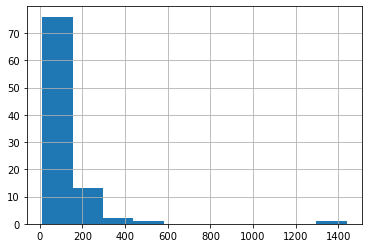

In [10]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['playlist_total_tracks'].hist()

In [11]:
len(playlist1_df[playlist1_df['playlist_total_tracks']>10])

93

<AxesSubplot:>

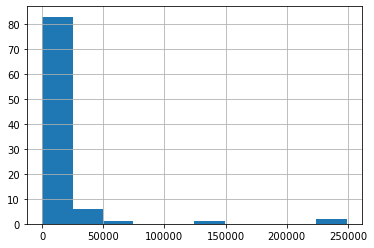

In [12]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['total_followers'].hist()

### Keyword 2

In [13]:
###################### set keyword
KEYWORD2='workout'

In [14]:
# read and process the playlist data for keyword
playlist2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_data.csv')
playlist2_df.head(20)

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DX70RN3TfWWJh,Workout,100,spotify,Spotify,4115739
1,37i9dQZF1DWUVpAXiEPK8P,Power Workout,50,spotify,Spotify,3532527
2,37i9dQZF1DX0HRj9P7NxeE,Workout Twerkout,50,spotify,Spotify,1677890
3,37i9dQZF1DX9ZKyQHcEFXZ,Perreo Workout,100,spotify,Spotify,1613688
4,37i9dQZF1DX76t638V6CA8,Rap Workout,59,spotify,Spotify,1264359
5,37i9dQZF1DXe6bgV3TmZOL,Adrenaline Workout,120,spotify,Spotify,1135025
6,37i9dQZF1DX8CwbNGNKurt,Throwback Workout,50,spotify,Spotify,1049846
7,37i9dQZF1DWUSyphfcc6aL,Workout Beats,70,spotify,Spotify,816737
8,37i9dQZF1DX3ZeFHRhhi7Y,Fantastic K-Workout,50,spotify,Spotify,457514
9,0L33OqcgnqcdtUDhUAyfPW,Workout Music 2021⚡Trap Gym Playlist ⚡Magic Music,130,magicmusicsquad,Magic Records,449360


In [15]:
playlist2_df.shape

(92, 6)

In [16]:
# read and process the playlist data for keyword
tracks2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD2+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']=KEYWORD2
tracks2_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,duration_mins,genre
0,0zzVTGyRrWpQu8Fr28NRAv,OK Not To Be OK,64KEffDW9EtZ1y2vBYgq8T,Marshmello,3wCtCJ8O6SlGBWYfzAlsb2,159862,2020-09-10,82,0.743,0.837,...,0.000000,0.0743,0.263,103.072,37i9dQZF1DX70RN3TfWWJh,Workout,37i9dQZF1DX70RN3TfWWJh,Workout,2.664367,workout
1,4FYbo4yQzu3hGkj2Ix4ucW,Funny,2qxJFvFYMEDqd7ui6kSAcq,Zedd,5Q8Uyc3KUlPhPtMQDY5SWm,221465,2020-07-16,76,0.664,0.660,...,0.000000,0.2600,0.355,99.946,37i9dQZF1DX70RN3TfWWJh,Workout,37i9dQZF1DX70RN3TfWWJh,Workout,3.691083,workout
2,6ZuahEctZD6w75peme58hm,Wonder,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,3Lp4JKk2ZgNkybMRS3eZR5,172692,2020-12-04,80,0.442,0.631,...,0.000023,0.1330,0.129,139.774,37i9dQZF1DX70RN3TfWWJh,Workout,37i9dQZF1DX70RN3TfWWJh,Workout,2.878200,workout
3,5hvwx5i67IwnCkjl9VHkNv,Diamonds,2wY79sveU1sp5g7SokKOiI,Sam Smith,2IAyprsfyoPBGDvbLjgsN5,213869,2020-09-17,85,0.653,0.667,...,0.000000,0.1070,0.556,104.181,37i9dQZF1DX70RN3TfWWJh,Workout,37i9dQZF1DX70RN3TfWWJh,Workout,3.564483,workout
4,5u1n1kITHCxxp8twBcZxWy,Holy (feat. Chance The Rapper),1uNFoZAHBGtllmzznpCI3s,Justin Bieber,4hR7jjsPvRwwcHx8ntJSQS,212093,2020-09-18,91,0.673,0.704,...,0.000000,0.0898,0.372,86.919,37i9dQZF1DX70RN3TfWWJh,Workout,37i9dQZF1DX70RN3TfWWJh,Workout,3.534883,workout


In [17]:
tracks2_df.shape

(1772, 25)

In [18]:
# How many unique tracks are in playlist 2?
len(tracks2_df['track_id'].unique())

1679

## Data Prep

In [79]:
#!ls data -lah

In [98]:
#keywords = ['wedding', 'workout']

keywords = ['Dance Pop', 'Jazz', \
            'OPM', 'R&B', 'breakup', \
            'classical', 'country', 'electronic', \
            'funeral', 'hiphop', 'party',\
           'pop', 'post-teen pop', 'rap',\
           'reggae', 'rock', 'wedding',\
           'workout']


In [99]:
for i in (keywords):
    print(i)
    print(keywords.index)

Dance Pop
<built-in method index of list object at 0x000001B7637CD880>
Jazz
<built-in method index of list object at 0x000001B7637CD880>
OPM
<built-in method index of list object at 0x000001B7637CD880>
R&B
<built-in method index of list object at 0x000001B7637CD880>
breakup
<built-in method index of list object at 0x000001B7637CD880>
classical
<built-in method index of list object at 0x000001B7637CD880>
country
<built-in method index of list object at 0x000001B7637CD880>
electronic
<built-in method index of list object at 0x000001B7637CD880>
funeral
<built-in method index of list object at 0x000001B7637CD880>
hiphop
<built-in method index of list object at 0x000001B7637CD880>
party
<built-in method index of list object at 0x000001B7637CD880>
pop
<built-in method index of list object at 0x000001B7637CD880>
post-teen pop
<built-in method index of list object at 0x000001B7637CD880>
rap
<built-in method index of list object at 0x000001B7637CD880>
reggae
<built-in method index of list objec

In [100]:
for i in range(len(keywords)):
    print(keywords[i])
    print(keywords[i].index)

Dance Pop
<built-in method index of str object at 0x000001B76385D1F0>
Jazz
<built-in method index of str object at 0x000001B7639A6F30>
OPM
<built-in method index of str object at 0x000001B7637F1630>
R&B
<built-in method index of str object at 0x000001B763854370>
breakup
<built-in method index of str object at 0x000001B7637F1EF0>
classical
<built-in method index of str object at 0x000001B7637F15F0>
country
<built-in method index of str object at 0x000001B7637E7330>
electronic
<built-in method index of str object at 0x000001B7637E7EF0>
funeral
<built-in method index of str object at 0x000001B7637F1DF0>
hiphop
<built-in method index of str object at 0x000001B7637E74B0>
party
<built-in method index of str object at 0x000001B7637E7E30>
pop
<built-in method index of str object at 0x000001B753E79E70>
post-teen pop
<built-in method index of str object at 0x000001B763A63170>
rap
<built-in method index of str object at 0x000001B7637E7DB0>
reggae
<built-in method index of str object at 0x000001B7

In [101]:
keywords[0],keywords[1]

('Dance Pop', 'Jazz')

In [102]:
i = keywords[0]
print(i)

Dance Pop


**Data frame collection**

https://stackoverflow.com/questions/33907776/how-to-create-an-array-of-dataframes-in-python

In [103]:
tracks_df_merged = {} # data frame collection
idx = 0
i = keywords[idx]
print(i)

tmp_playlist_df = pd.read_csv('data/'+i+'_playlist_data.csv')
tmp_tracks_df = pd.read_csv('data/'+i+'_playlist_tracks_data.csv')\
                    .merge(pd.read_csv('data/'+i+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                          on='track_id',how='left')
#make duration ms to minutes
tmp_tracks_df['duration_mins']=tmp_tracks_df['duration']/60000
#tag genre with keyword
tmp_tracks_df['genre']=i

tracks_df_merged[i] = pd.DataFrame(tmp_playlist_df)

Dance Pop


In [104]:
tracks_df_merged

{'Dance Pop':                playlist_id                                      playlist_name  \
 0   37i9dQZF1DWZQaaqNMbbXa                                     Dance Pop Hits   
 1   6dtY8MCZ4ExwDvsfs5EARz                             Dance Pop Hits 2021 🕺💃   
 2   4SdfG4cPG3skmTiQLozZGh                                   Dance Pop Tunes    
 3   6RAGRcbf29KQhJpP3eD8cu  Best Music For Gaming 2021 🎮 Future Bass & Dan...   
 4   37i9dQZF1DWWOGXILUAh53                                    Fresh Dance Pop   
 5   37i9dQZF1DXahYFr91pFvG                                   Dance Pop: Japan   
 6   37i9dQZF1DX6pH08wMhkaI                                     Dance Pop Hits   
 7   6MCEBH2C7xz8YAK1Z3o1kO                      Dance Pop Hits & Chill Gaming   
 8   69N5GrdsCrd9l7iqpcoLc7  Workout 2021 🔥 Exercise Music 🔥 Best Dance Mus...   
 9   4pgOnmTM39JfS4kGBhd2RG                                    Dance Pop Viral   
 10  1TZSikRQOg9a8rckQeRerD                                    Dance Pop 2021!   
 11

In [105]:
for key in tracks_df_merged.keys():
    print("\n" +"="*40)
    print(key)
    print("-"*40)
    #print(tracks_df_merged[key])


Dance Pop
----------------------------------------


In [106]:
    
for i in range(1,len(keywords)):
    print(keywords[i])
    tmp_playlist_df = pd.read_csv('data/'+keywords[i]+'_playlist_data.csv')
    # read and process the playlist data for keyword
    tmp_tracks_df = pd.read_csv('data/'+keywords[i]+'_playlist_tracks_data.csv')\
                    .merge(pd.read_csv('data/'+keywords[i]+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                          on='track_id',how='left')
    #make duration ms to minutes
    tmp_tracks_df['duration_mins']=tmp_tracks_df['duration']/60000
    #tag genre with keyword
    tmp_tracks_df['genre']=keywords[i]
    
    tracks_df_merged[keywords[i]] = pd.DataFrame(tmp_playlist_df)

Jazz
OPM
R&B
breakup
classical
country
electronic
funeral
hiphop
party
pop
post-teen pop
rap
reggae
rock
wedding
workout


In [109]:
for key in tracks_df_merged.keys():
    print("\n" +"="*40)
    print(key)
    print("-"*40)
    #print(tracks_df_merged[key])


Dance Pop
----------------------------------------

Jazz
----------------------------------------

OPM
----------------------------------------

R&B
----------------------------------------

breakup
----------------------------------------

classical
----------------------------------------

country
----------------------------------------

electronic
----------------------------------------

funeral
----------------------------------------

hiphop
----------------------------------------

party
----------------------------------------

pop
----------------------------------------

post-teen pop
----------------------------------------

rap
----------------------------------------

reggae
----------------------------------------

rock
----------------------------------------

wedding
----------------------------------------

workout
----------------------------------------


In [114]:
# tracks_df_merged2
tracks_df_merged2 = pd.DataFrame(tracks_df_merged[keywords[0]])
tracks_df_merged2.head()

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,150,spotify,Spotify,196168
1,6dtY8MCZ4ExwDvsfs5EARz,Dance Pop Hits 2021 🕺💃,61,topsify,Topsify,86201
2,4SdfG4cPG3skmTiQLozZGh,Dance Pop Tunes,105,sonymusicnl,Filtr Nederland,64588
3,6RAGRcbf29KQhJpP3eD8cu,Best Music For Gaming 2021 🎮 Future Bass & Dan...,98,magicmusicsquad,Magic Records,54152
4,37i9dQZF1DWWOGXILUAh53,Fresh Dance Pop,99,spotify,Spotify,50608


In [115]:
for i in range(1,len(keywords)):
    tracks_df_merged2 = pd.concat([tracks_df_merged2,tracks_df_merged[keywords[i]]],ignore_index=True)

In [117]:
def explore_data(df):
    print("**** Dimensions or Shape (rows x columns)")
    display(df.shape)
    print("**** Column Names")
    display(df.columns)
    print("**** Data Types")
    display(df.dtypes)
    print("**** Descriptive Statistics")
    display(df.describe())
    print("**** Head")
    display(df.head())
    print("**** Null Checks")
    display(df.isnull().sum())

In [118]:
explore_data(tracks_df_merged2)

**** Dimensions or Shape (rows x columns)


(1494, 6)

**** Column Names


Index(['playlist_id', 'playlist_name', 'playlist_total_tracks', 'owner_id',
       'owner_name', 'total_followers'],
      dtype='object')

**** Data Types


playlist_id              object
playlist_name            object
playlist_total_tracks     int64
owner_id                 object
owner_name               object
total_followers           int64
dtype: object

**** Descriptive Statistics


,playlist_total_tracks,total_followers
count,1494.000000,1.494000e+03
mean,128.172021,1.974136e+05
std,225.006287,7.016438e+05
min,2.000000,0.000000e+00
25%,50.000000,1.430500e+03
50%,80.000000,1.626500e+04
75%,131.000000,1.012410e+05
max,5197.000000,1.358868e+07


**** Head


,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWZQaaqNMbbXa,Dance Pop Hits,150,spotify,Spotify,196168
1,6dtY8MCZ4ExwDvsfs5EARz,Dance Pop Hits 2021 🕺💃,61,topsify,Topsify,86201
2,4SdfG4cPG3skmTiQLozZGh,Dance Pop Tunes,105,sonymusicnl,Filtr Nederland,64588
3,6RAGRcbf29KQhJpP3eD8cu,Best Music For Gaming 2021 🎮 Future Bass & Dan...,98,magicmusicsquad,Magic Records,54152
4,37i9dQZF1DWWOGXILUAh53,Fresh Dance Pop,99,spotify,Spotify,50608


**** Null Checks


playlist_id              0
playlist_name            0
playlist_total_tracks    0
owner_id                 0
owner_name               0
total_followers          0
dtype: int64

## Save merged data

In [119]:
tracks_df_merged2.to_csv("data/genres_df.csv", index=False)

## 2. Compare histograms of 2 playlist sets

In [ ]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(tracks1_df[col], ax=ax, label= KEYWORD1)
    sns.distplot(tracks2_df[col], ax=ax, label= KEYWORD2)
    plt.title("%s vs %s: %s " % (KEYWORD1,KEYWORD2,col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()


>Q: What feature/s best distinguish the 2 categories from each other? Does it make sense to use this as a feature for a classification model?

## 3. Feature Engineering

In [ ]:
#get union of two playlist tracks list
tracks_df = pd.concat([tracks1_df,tracks2_df])
tracks1_df.shape, tracks2_df.shape, tracks_df.shape

In [ ]:
#retain only distinct tracks per keyword
tracks_df =tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

In [ ]:
#Normalize loudness
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()


In [ ]:
#Normalize tempo
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
#check
tracks_df['tempo'].describe()


In [ ]:
# map genres to numbers
tracks_df['genre_id'] = tracks_df['genre'].map({KEYWORD1:1,KEYWORD2:2})

## 4. Preview possible groupings

>Q: Pick the 2 best distinguishing features of the 2 playlist sets and plot each row as a scatterplot/distplot colored by genre


In [ ]:
sns.scatterplot(data=tracks_df, x='energy', y='tempo', hue='genre')

In [ ]:
fig = plt.figure()
ax= fig.add_subplot(111)

colormaps = ['Reds','Blues']
for n,genre in enumerate([KEYWORD1,KEYWORD2]):
    df=tracks_df[tracks_df['genre']==genre]
    sns.kdeplot(df['energy'],df['tempo'], ax=ax,\
                shade=True, shade_lowest=False, alpha=0.5, cmap=colormaps[n],\
                label=genre)
    
plt.legend(frameon=False)


> Q: How would you interpret the resulting scatterplot/distribution?

## 5. Model Tuning: kNN

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report

Select audio features to use for the model

In [ ]:
# create feature matrix (X)
feature_cols = ['energy','tempo','speechiness']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


Perform KNN using K= [1..50] and validate using k-fold k = 5

In [ ]:
cv_scores = []
neighbors = np.arange(2,51)

for k in neighbors:
    print('Fitting for k=%d' % k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

Choose optimal value of K

In [ ]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

Compute accuracy of optimal K for the testing set

In [ ]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, Y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

In [ ]:
print(confusion_matrix(y,knn_optimal.predict(X)))

Create a classification report

In [ ]:
print(classification_report(y,knn_optimal.predict(X)))

- accuracy = all correct /all
- precision =  TP/TP+FP
- recall = TP/TP+FN
- f1-score = weighted average of Precision and Recall
        F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- support = number of items in the class

- macro ave = average of the unweighted mean per label
- weighted ave = average of the weighted mean per label


Plot an ROC curve for each position type prediction using the optimal KNN model

In [ ]:
y_scores = knn_optimal.predict_proba(X_test)
genres = tracks_df['genre'].unique()

fig = plt.figure(figsize=[8,5])

for i in np.arange(len(genres)):
    genre_id = i+1
    y_test =[1 if k==genre_id else 0 for k in Y_test]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i])
    roc_auc = auc(fpr, tpr)

    ax = fig.add_subplot('1'+str(len(genres))+str(i))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Y = '+str(genres[i]))


## 6. Model Tuning: SVM

## 7. Model Selection

Which between KNN and SVM performed better? 
Create a column matching the predicted genre and probability of the better model to each of the tracks

In [ ]:
tracks_df[feature_cols].values.reshape(1,-1)

In [ ]:
tracks_df.head()

In [ ]:
tracks_df.shape

In [ ]:
tracks_df = tracks_df.dropna()

In [ ]:
#tracks_df = tracks_df[(~tracks_df.isnan())]

In [ ]:
tracks_df.shape

In [ ]:
tracks_df.columns

In [ ]:
tracks_df['predicted_genre_id'] = tracks_df.apply(lambda x:  knn_optimal.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)

In [ ]:
tracks_df['predicted_genre_prob'] = tracks_df.apply(lambda x:  np.max(knn_optimal.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
tracks_df

Check tracks mistakenly classified with but high probability 

In [ ]:
tracks_df[(tracks_df['predicted_genre_id']!=tracks_df['genre_id'])&(tracks_df['predicted_genre_prob']>0.9)]

> Q: Focus on any of the songs you know that made it in the misclassified list (you may listen to some of them) 
    Does it make sense that the model misclassfied this song? Why or why not?

>Q: Would this model correctly classify tracks from the Spotify charting tracks dataset?

In [ ]:
chart_tracks_df = pd.read_csv("data/spotify_daily_charts_tracks.csv")

#chart_tracks_df = chart_tracks_df[(~chart_tracks_df.isnan())]
chart_tracks_df = chart_tracks_df = chart_tracks_df.dropna()

chart_tracks_df.head()

In [ ]:
chart_tracks_df['predicted_genre_id'] = chart_tracks_df.apply(lambda x:  knn_optimal.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
chart_tracks_df['predicted_genre_prob'] = chart_tracks_df.apply(lambda x:  np.max(knn_optimal.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
chart_tracks_df.head()

In [ ]:
#Check tracks classified with higher probability
chart_tracks_df.sort_values(['predicted_genre_prob'])[:10]

In [ ]:
#View histogram of probabilities
chart_tracks_df['predicted_genre_prob'].hist()

## Day 7 Exercise
1. *Genre Classification (Individual)*

    A. Choose up to 6 music genres and obtain track data from the genre's top 20 most-followed playlists in Spotify. A group may distribute the data gathering task by assigning a genre to each person and then pooling all the gathered data in one shared folder. Alternatively, you may also use the provided sample playlist data.
    
   B. Pick any 2 music genres as your groupings for the classification exercise and repeat Steps 1-7. Make sure to answer the guide questions for each step
   
   C. Increase the number of features included in the models and repeat Steps 1-7 (but skip code cells for plotting-- viz for >2D will not work). How does this affect the model scores? Find the combination of features that will give you the best accuracy score.
   
   D. CHALLENGE (optional) Modify the notebook to take in any 3 music genres as groupings and repeat Steps 1-7.
   

2. *(Optional, but useful to do ahead for your sprint project)*

    There are almost [innumerable](https://www.musicgenreslist.com/) named music genres online, but a summarized list  may be found [here](https://www.blisshq.com/music-library-management-blog/2011/01/25/fundamental-music-genre-list/). Can you build a model that can predict **at least 5 genres** listed in the latter with **>70% classification accuracy**?
    